<a href="https://colab.research.google.com/github/RickBerends/Domain-Specific-BERT-for-Depression-Detection/blob/main/ELMO_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import torch
import tensorflow
import os
import glob

import nltk
nltk.download('popular')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
os.chdir('/content/drive/My Drive/Splits')

#Load train, split = 0 for train. 
df = pd.read_csv("train_split.csv", usecols=[0,1])
df['split'] = 0
df['Participant_ID'].astype(int)

#Load test split, split = 2 for test.
df1 = pd.read_csv("full_test_split copy.csv", sep=';', usecols=[0,1])
df1['split'] = 2
df1['Participant_ID'].astype(int)
df1.rename(columns = {'PHQ_Binary':'PHQ8_Binary'}, inplace = True)

#Load dev split, split = 1 for dev.
df2 = pd.read_csv("dev_split.csv", usecols=[0,1])
df2['split'] = 1
df2['Participant_ID'].astype(int)

#Get them together
final_df = pd.concat([df,df1,df2])
final_df.sort_values('Participant_ID', inplace=True)

#Building data cleaning. 

def clean_text(text): 
  #stop_words = set(stopwords.words('english'))
  #lemmatizer = WordNetLemmatizer()

  text = text.lower()
  text = re.sub(r"<sync>", "",text)
  text = re.sub(r"he's", "he is", text)
  text = re.sub(r"there's", "there is", text)
  text = re.sub(r"we're", "we are", text)
  text = re.sub(r"That's", "That is", text)
  text = re.sub(r"won't", "will not", text)
  text = re.sub(r"they're", "they are", text)
  text = re.sub(r"can't", "cannot", text)
  text = re.sub(r"wasn't", "was not", text)
  text = re.sub(r"don't", "do not", text)
  text = re.sub(r"aren't", "are not", text)
  text = re.sub(r"isn't", "is not", text)
  text = re.sub(r"what's", "what is", text)
  text = re.sub(r"haven't", "have not", text)
  text = re.sub(r"hasn't", "has not", text)
  text = re.sub(r"there's", "there is", text)
  text = re.sub(r"he's", "he is", text)
  text = re.sub(r"it's", "it is", text)
  text = re.sub(r"you're", "you are", text)
  text = re.sub(r"i'm", "i am", text)
  text = re.sub(r"shouldn't", "should not", text)
  text = re.sub(r"wouldn't", "would not", text)
  text = re.sub(r"isn't", "is not", text)
  text = re.sub(r"here's", "here is", text)
  text = re.sub(r"you've", "you have", text)
  text = re.sub(r"we're", "we are", text)
  text = re.sub(r"what's", "what is", text)
  text = re.sub(r"couldn't", "could not", text)
  text = re.sub(r"we've", "we have", text)
  text = re.sub(r"it's", "it is", text)
  text = re.sub(r"doesn't", "does not", text)
  text = re.sub(r"who's", "who is", text)
  text = re.sub(r"y'all", "you all", text)
  text = re.sub(r"would've", "would have", text)
  text = re.sub(r"it'll", "it will", text)
  text = re.sub(r"we'll", "we will", text)
  text = re.sub(r"we've", "we have", text)
  text = re.sub(r"he'll", "he will", text)
  text = re.sub(r"y'all", "you all", text)
  text = re.sub(r"weren't", "Were not", text)
  text = re.sub(r"didn't", "did not", text)
  text = re.sub(r"they'll", "they will", text)
  text = re.sub(r"they'd", "they would", text)
  text = re.sub(r"don't", "do not", text)
  text = re.sub(r"they've", "they have", text)
  text = re.sub(r"i'd", "I would", text)
  text = re.sub(r"should've", "should have", text)
  text = re.sub(r"where's", "where is", text)
  text = re.sub(r"we'd", "we would", text)
  text = re.sub(r"i'll", "i will", text)
  text = re.sub(r"weren't", "were not", text)
  text = re.sub(r"they're", "they are", text)
  text = re.sub(r"let's", "let us", text)
  text = re.sub(r"it's", "it is", text)
  text = re.sub(r"can't", "cannot", text)
  text = re.sub(r"don't", "do not", text)
  text = re.sub(r"you're", "you are", text)
  text = re.sub(r"i've", "i have", text)
  text = re.sub(r"that's", "that is", text)
  text = re.sub(r"i'll", "i will", text)
  text = re.sub(r"doesn't", "does not", text)
  text = re.sub(r"i'd", "i would", text)
  text = re.sub(r"didn't", "did not", text)
  text = re.sub(r"ain't", "am not", text)
  text = re.sub(r"you'll", "you will", text)
  text = re.sub(r"i've", "i have", text)
  text = re.sub(r"Don't", "do not", text)
  text = re.sub(r"i'll", "i will", text)
  text = re.sub(r"i'd", "i would", text)
  text = re.sub(r"let's", "Let us", text)
  text = re.sub(r"you'd", "you would", text)
  text = re.sub(r"it's", "it is", text)
  text = re.sub(r"ain't", "am not", text)
  text = re.sub(r"haven't", "have not", text)
  text = re.sub(r"could've", "could have", text)
  text = re.sub(r"youve", "you have", text)  
  text = re.sub(r"[-()\"#/@;:<>.?,]","",text)
  text = ' '.join(text.split())
  text = text.split(' ')
  #text = [w for w in text if not w in stop_words]
  #text = [lemmatizer.lemmatize(w) for w in text]
  text = ' '.join(text)
  return text

#Loading all the text from the individual transcripts into one dataframe. 
os.chdir('/content/drive/My Drive/DAICWOZ_transcripts')

lst = []
labels = []
pd.set_option('max_colwidth', 800)

for file in glob.glob("*.csv"):
    name = file
    try: 
        df = pd.read_csv(name, usecols=[2,3], sep='\t')
        outcome = df['speaker'] == 'Participant' 
        new_str = ''
    except ValueError: 
        print(name)
        continue
    for index, j in enumerate(outcome):
        if j == False: 
            continue
        else: 
            response = df['value'][index:index+1]
            response = response.to_string(index=False)
            new_str+= response
    new_str = clean_text(new_str)
    lst.append(new_str)
    labels.append(name.split('_')[0])

final_df['text'] = lst

In [ ]:
#Split the text, based on the length of the text. 

def get_split(text1): 
  l_total = []
  l_partial = []

  #Check whether or not the text is bigger than 150 words and should be split.
  if len(text1.split())//20>0:
    n = len(text1.split())//20
  else: 
    n = 1
  
  #If that's the case, the first split is smaller than 200, the next split is [150:350], [300:550] etc. 
  for w in range(n): 
    if w == 0: 
      l_partial = text1.split()[:20]
      l_total.append(" ".join(l_partial))

    else: 
      l_partial = text1.split()[w*20: w*20+ 20]
      l_total.append(" ".join(l_partial))
  return l_total

twohundred_lst = []

for i in lst: 
  twohundred_lst.append(get_split(i))

#Finally replace the "text" with text, split up in lists.
final_df['text'] = twohundred_lst

In [ ]:
df_train = pd.DataFrame()
df_val = pd.DataFrame()
df_test = pd.DataFrame()

df_train = final_df[final_df['split'] == 0]
df_val = final_df[final_df['split'] == 1]
df_test = final_df[final_df['split'] == 2]

In [ ]:
#Copy dataframe to new dataframe
df_train_over = df_train.copy()

#Sample random rows
n = 77 - 30 

#Minority class
minor = df_train[df_train['PHQ8_Binary'] == 1]

rows = minor.sample(47, replace = True)

over_train_df = df_train_over.append(rows, ignore_index=True)
df_train = over_train_df

df_train

,Participant_ID,PHQ8_Binary,split,text
0,303,0,0,"[mm maybe okay i am from california it is sun there is sunshine s sunshine weather mhm what do you, like about l_a laughter what do laughter um i like um sniff i just said i i like li like, the weather the traffic no i do not have the means i studied liberal art a art a i studied, um film because i live in los angeles not really um uh to work i i want to become a, laughter i do not care ca i do not know i i i i do not wanna tell you yeah, okay i am very outgoing because because are you outgoing laughter um sit down sleep um i think about it, and then i stop it is easy um i do not remember um for not changing the battery on my, phone no it was the battery on my car i did not change it and it did not start and, i procrastinated and so yeah yeah that is a bad word you cannot say that i no..."
1,304,0,0,"[i am doing alright uh originally i am from california uh born in glendale i am not too happy with, it uh just unemployed at the moment but uh actively seeking uh uh doing what i am supposed to be, doing uh there are some uh some prospects there but hopefully i will learn something today yeah well i have, one it is a girlfriend so i consider her a roommate a lover type thing pardon me um we are, pretty close uh i met her last year and uh we have been through some troubling times but uh we, are starting to see a light at the end of the tunnel uh the troubling times uh i would let, me see uh well i had uh gotten a d_u_i last year and uh lost my job i am a, truck driver by trade so uh that kinda threw me way off uh having a fourteen hundred dollar a week, job uh and then going to nothing ..."
2,305,0,0,"[yeah i am totally fine it be confidential or not you know my words wo my words are everybody's get, wild laughter i am doing pretty good hanging out nice weather um i just had a recent change of feeling, just now looking at you laughter the the digitial you that i am saying uh i do not know it, is yeah it is funny um tisk because i just always thought that uh the conveying of emotions or feelings, uh be like better understood with a human interaction as opposed to a non human entity such as yourself yeah, i i think you see what i mean laughter i am from um born and raised in los angeles venice, area mar vista specifically um that is where i am from um well there is a lot more that i, do not like but what i do like is that public transportation is coming up uh that the idea of, certain..."
3,310,0,0,"[synch yes pretty good alexandria virginia mhm uh i moved to l_a uh end of two thousand one yeah it, is crazy laughter um a couple times a year usually like for holidays hmm sigh it is sigh it is, very different um i think it is a lot more mellow um it is way more like suburbia it is, nice um it there is something comforting about it but it is always like i get a little restless when, i am there and look forward to coming back here where there is a little more action sniffle i went, to um grad school at u_s_c um it was it was not bad i mean my my program that i, was in was so intense that like for the first year it was so all consuming that i really did, not have much spare time to think about the adjustment it was just like i laughter my life was not, my own so that made it kind of um..."
4,312,0,0,"[yes i am doing fine indiana yes uh i do not know maybe ten years ago never uh just do, not like the cold weather l_a has beautiful weather and activities all the time new life uh reasonably easy the, good weather the ocean and there is always something to do hm uh the traffic sometimes seeing new places uh, and visiting new people well a couple years ago i went to the catalina islands for my birthday i was, i spent the whole day uh on the catalina islands i took a boat there uh hopping on the airplane, and leaving indiana for good okay sleeping uh being a filmmaker because it is one job i have not had, yet not too hard shy hm because of my past um i just have trouble making new friends and ju

In [ ]:
def read_elmo(dataframe, val): 

  elmo_list = []

  for p in dataframe.Participant_ID.values.tolist(): 

    elmo_file = str(p) + '_elmo.csv'

    if val == 1: 
      elmo_path = '/content/drive/My Drive/elmo/' + elmo_file
    elif val == 2: 
      elmo_path = '/content/drive/My Drive/elmo_val/' + elmo_file
    else: 
      elmo_path = '/content/drive/My Drive/elmo_test/' + elmo_file
    
    elmo = pd.read_csv(elmo_path, delimiter=',', usecols=range(1,1023), header=None)
    elmo_list.append(elmo)

  return elmo_list

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
x_train = read_elmo(df_train, 1)
y_train = df_train['PHQ8_Binary']
x_val = read_elmo(df_val, 2)
y_val = df_val['PHQ8_Binary']
x_test = read_elmo(df_test, 3)
y_test = df_test['PHQ8_Binary']

In [ ]:
x_train=np.asarray(x_train).astype(np.float)
y_train=np.asarray(y_train).astype(np.int)
x_val = np.asarray(x_val).astype(np.float)
y_val = np.asarray(y_val).astype(np.int)
x_test = np.asarray(x_test).astype(np.float)
y_test = np.asarray(y_test).astype(np.int)

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (5,1022)))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1, activation='sigmoid'))

regressor.compile(optimizer = 'adamW', loss = 'binary_crossentropy', metrics=['accuracy'])
regressor.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 15, batch_size = 64)

Epoch 1/15
3/3 [==============================] - 9s 838ms/step - loss: 0.6931 - accuracy: 0.4207 - val_loss: 0.7032 - val_accuracy: 0.3429
Epoch 2/15
3/3 [==============================] - 0s 59ms/step - loss: 0.6956 - accuracy: 0.5195 - val_loss: 0.6930 - val_accuracy: 0.5714
Epoch 3/15
3/3 [==============================] - 0s 58ms/step - loss: 0.6938 - accuracy: 0.5240 - val_loss: 0.6859 - val_accuracy: 0.6571
Epoch 4/15
3/3 [==============================] - 0s 60ms/step - loss: 0.6926 - accuracy: 0.5475 - val_loss: 0.6827 - val_accuracy: 0.6571
Epoch 5/15
3/3 [==============================] - 0s 60ms/step - loss: 0.6925 - accuracy: 0.4980 - val_loss: 0.6880 - val_accuracy: 0.6571
Epoch 6/15
3/3 [==============================] - 0s 62ms/step - loss: 0.6905 - accuracy: 0.5943 - val_loss: 0.6939 - val_accuracy: 0.4000
Epoch 7/15
3/3 [==============================] - 0s 61ms/step - loss: 0.6866 - accuracy: 0.5676 - val_loss: 0.6954 - val_accuracy: 0.3143
Epoch 8/15
3/3 [==========

In [ ]:
y_pred = regressor.predict(x_test)

y_pred[y_pred <= 0.5] = 0.
y_pred[y_pred > 0.5] = 1.

In [ ]:
f1_score(y_test, y_pred=y_pred, average='weighted')

0.48936170212765956

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Not depressed', 'Depressed']))

               precision    recall  f1-score   support

Not depressed       0.64      0.64      0.64        33
    Depressed       0.14      0.14      0.14        14

     accuracy                           0.49        47
    macro avg       0.39      0.39      0.39        47
 weighted avg       0.49      0.49      0.49        47



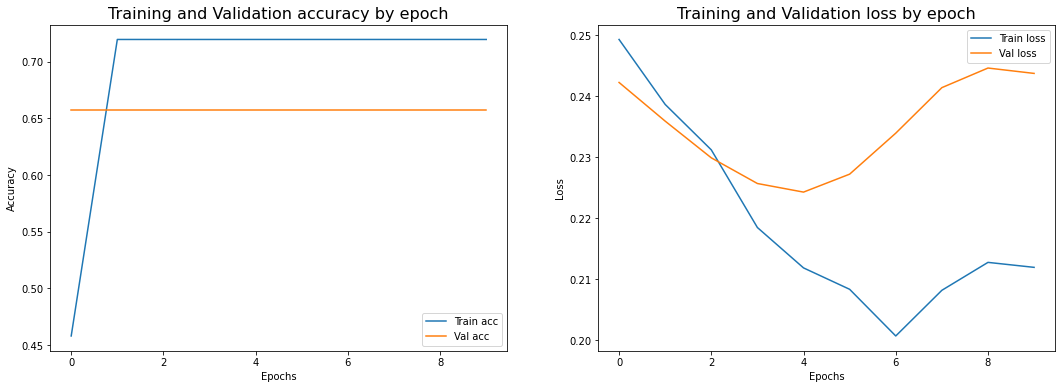

In [ ]:
history = regressor.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=64, epochs=10, verbose=0)

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Training and Validation accuracy by epoch', fontsize=16)
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.legend(['Train acc', 'Val acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.title('Training and Validation loss by epoch', fontsize=16)
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend(['Train loss', 'Val loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
print(history.history[''])